#                     Patients No_show analysis

## We are going to analyse a dataset that collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

### *1) what are the factors which affect showing-up??*
### *2) what are the common diseases for each gender ??*
### *3) what is the effect of aging,and the diseases distribution ??*
### *4) Are there spikes or valleys in showing up regarding date ??*
### *5) What are the top regions regarding showing up ??*

In [17]:
# importing libraries for analysis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [18]:
# reading the dataset in a pandas dataframe

df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling





#### Columns editting


In [19]:
df.rename(columns = lambda x : x.strip().lower().replace('-',"_"),inplace = True)
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Taking glimses about the dataset

In [20]:
df.shape

(110527, 14)

In [21]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


None

####  Fixing columns data types

In [27]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

In [22]:
df.info

<bound method DataFrame.info of            patientid  appointmentid gender          scheduledday  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.113946

#### Check for duplicates

In [39]:
df.duplicated().sum()

0

#### Check for null values

In [40]:
df.isnull().any()

patientid         False
appointmentid     False
gender            False
scheduledday      False
appointmentday    False
age               False
neighbourhood     False
scholarship       False
hipertension      False
diabetes          False
alcoholism        False
handcap           False
sms_received      False
no_show           False
dtype: bool

In [41]:
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no_show                2
dtype: int64

In [42]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [43]:
display(df.age.value_counts())

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [44]:
counter(df['handcap'])

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [61]:
def counter(x):
    C = x.value_counts()
    return C


0    108286
1      2042
Name: handcap, dtype: int64

#### We can notice that :
 - there is a patient age ( - 1 )
 - Handcap value ( 2,3,4 )

So, we should fix them


In [45]:
df.drop(axis = 0 , index = 99832,inplace = True)

In [46]:
df[df['age']== -1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [28]:
df_handcap = df[df['handcap']>1]
df.drop(df_handcap.index,axis = 0 ,inplace = True)

In [36]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.103280e+05,1.103280e+05,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000
mean,1.475273e+14,5.675299e+06,37.070408,0.098280,0.196831,0.071605,0.030382,0.018508,0.321179
std,2.561394e+14,7.129914e+04,23.098231,0.297694,0.397606,0.257833,0.171637,0.134781,0.466931
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174654e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680568e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725510e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### *We can see that the -ve age and  handcap outlier numbers have been fixed*

## Exploratory Data Analysis 

### Age distribution :

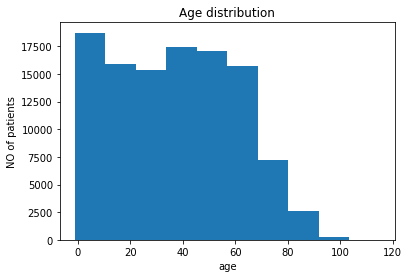

In [44]:
df['age'].plot(kind='hist');
plt.title('Age distribution');
plt.xlabel('age');
plt.ylabel('NO of patients');

### 1) Detecting the gender which is more subjected to each type of diseases :

In [30]:
df.groupby('gender').mean()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
gender,,,,,,,,,
F,1.460022e+14,5.674329e+06,38.88054,0.123238,0.213157,0.077791,0.01705,0.016464,0.337051
M,1.503618e+14,5.677100e+06,33.70635,0.051895,0.166490,0.060108,0.05516,0.022307,0.291681


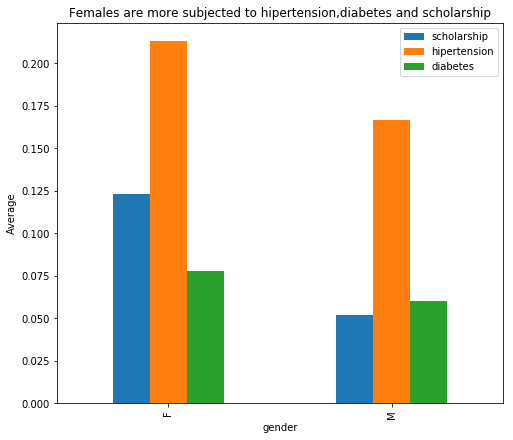

In [46]:
df.groupby('gender')['scholarship','hipertension','diabetes'].mean().plot(kind='bar',figsize=(8,7));
plt.ylabel('Average');
plt.title('Females are more subjected to hipertension,diabetes and scholarship');

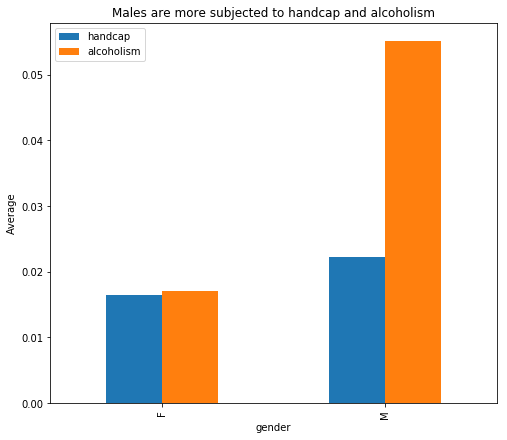

In [48]:
df.groupby('gender')['handcap','alcoholism'].mean().plot(kind='bar',figsize=(8,7));
plt.ylabel('Average');
plt.title('Males are more subjected to handcap and alcoholism');

<font color='green'>*As we can see that females are more subjected to hipertention,diabetes & having a scholarship,as well.*</font>

<font color='green'>*Meanwhile, males are more subjected to alcoholism & handcaps*</font>




## 2)Exploring the factors which may affect showing-up :

In [49]:
# we may create a categorised dataframe for showing and not showing probabilities
df.groupby('no_show').mean()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,,,,,
No,1.477051e+14,5.681125e+06,37.776650,0.093878,0.204066,0.073572,0.030403,0.019035,0.291425
Yes,1.468248e+14,5.652270e+06,34.279109,0.115675,0.168238,0.063830,0.030299,0.016429,0.438774


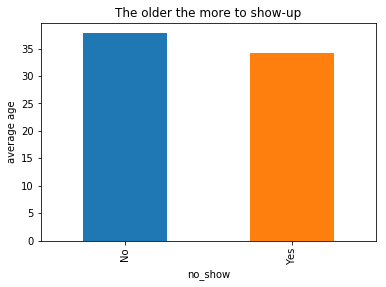

In [51]:
df.groupby('no_show')['age'].mean().plot(kind = 'bar');
plt.ylabel('average age');
plt.title('The older the more to show-up');

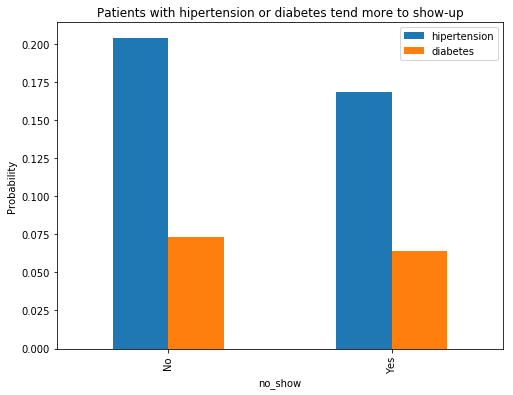

In [53]:
df.groupby('no_show')['hipertension','diabetes'].mean().plot(kind = 'bar',figsize = (8,6));
plt.ylabel('Probability');
plt.title('Patients with hipertension or diabetes tend more to show-up');

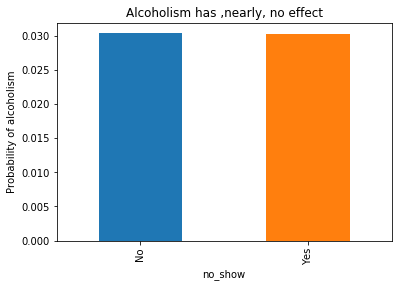

In [55]:
df.groupby('no_show')['alcoholism'].mean().plot(kind = 'bar');
plt.ylabel('Probability of alcoholism');
plt.title('Alcoholism has ,nearly, no effect');

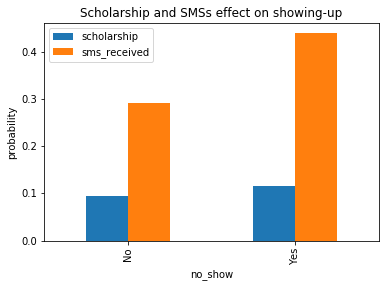

In [57]:
df.groupby('no_show')['scholarship','sms_received'].mean().plot(kind = 'bar');
plt.ylabel('probability');
plt.title('Scholarship and SMSs effect on showing-up');

<font color='green'>*we may notice that the higher the age the higher probability of showing up.*</font>

<font color='green'>*The people with hipertension and diabetes tend more to show-up.*</font>

<font color='green'>*Roughly,alcoholism may cause no effect to showing-up.*</font>

<font color='green'>*Holding a scholarship increases the probability of not showing*</font>

<font color='green'>*Its really weird,but the patient tend not to show when they receive a message.</font>


### 3) Detecting the influence of aging on the no. of infections :

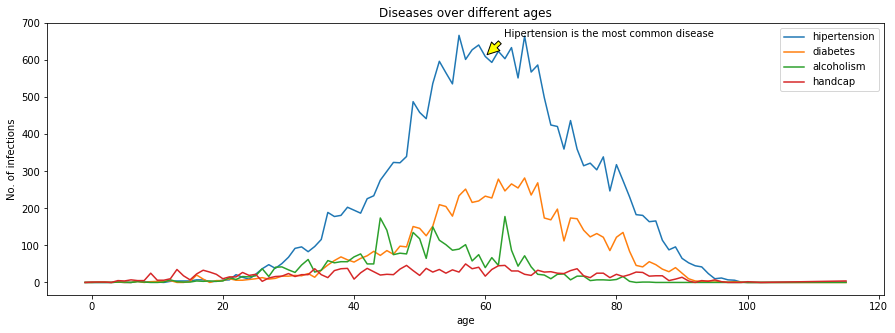

In [58]:
age_disease = df.groupby('age')['hipertension','diabetes','alcoholism','handcap'].sum()
age_disease.plot( kind = 'line',figsize =(15,5) );
plt.ylabel('No. of infections');
plt.annotate('Hipertension is the most common disease ',xy=(60,610),  xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='yellow', shrink=0.10),
            horizontalalignment='right');
plt.title('Diseases over different ages');

<font color='green'>*It's clear that there is a hot spot for people to get thick ----> ( 25 : 90  years old)*</font>

<font color='green'>*Also, It's noteworthy that the hipertension is widely spread than the other types of diseases.So,People should follow protective measures against it.*</font>

### 4) The trend of showing-up overtime :

In [58]:
show = df[df['no_show'] == 'No']
display(show.groupby('appointmentday')['no_show'].count())

appointmentday
2016-04-29    2594
2016-05-02    3511
2016-05-03    3418
2016-05-04    3189
2016-05-05    3458
2016-05-06    3076
2016-05-09    3494
2016-05-10    3311
2016-05-11    3582
2016-05-12    3554
2016-05-13    3074
2016-05-14      30
2016-05-16    3559
2016-05-17    3429
2016-05-18    3478
2016-05-19    3369
2016-05-20    2926
2016-05-24    3194
2016-05-25    3148
2016-05-30    3620
2016-05-31    3507
2016-06-01    3644
2016-06-02    3501
2016-06-03    3282
2016-06-06    3813
2016-06-07    3589
2016-06-08    3699
Name: no_show, dtype: int64

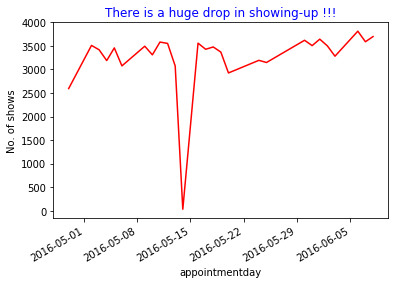

In [59]:
show.groupby('appointmentday')['no_show'].count().plot(kind = 'line',color = 'red');
plt.title('There is a huge drop in showing-up !!!',color = 'Blue');
plt.ylabel('No. of shows');

<font color='green'>*There is a huge drop in the no. of patients who showed-up on 14th of May.*</font>
<font color='green'>*By further investigation, we may know that on 14th of May in Brazil, there were important athletic events as :*</font>

<font color='green'>1)Popular team football match.
          2) Olympic events</font>
          
<font color='green'>**--->So,Important athletic events result in low showing-up**</font>
         

### 5) Top regions where people tend more to show :

In [60]:
show = df[df.no_show=='No']

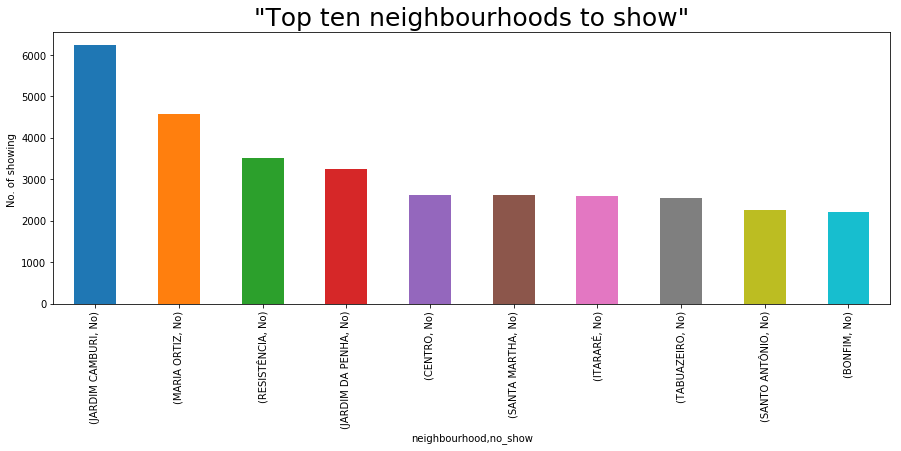

In [61]:
show.groupby('neighbourhood')['no_show'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar',figsize=(15,5));
plt.title('"Top ten neighbourhoods to show"', fontsize = 25);
plt.ylabel('No. of showing ');

# **Finally we can conclude that:**

<font color='green'>*1)Females are more subjected to hipertension,diabetes and having a scholarship as well.While males are more subjected to alcoholism and hancap.*</font>

<font color='green'>*2)Holding a scholarship or receiving an sms ------> Decreases the probability of showing-up.*</font>

<font color='green'>*3)People with hipertension,diabetes or handcap ------> Enhance the probability of showing-up.*</font>

<font color='green'>4)*It's clear that there is a hot spot for people to get thick ----> ( 25 : 90  years old).*</font>

<font color='green'>5)*Also, It's noteworthy that the hipertension is widely spread than the other types of diseases.So,People should follow protective measures against it.*</font>

<font color='green'>*6)Important athletic events result in low showing-up.*</font>

<font color='green'>*7)Eventually, we have determined the highest ten regions where patients are more likely to show.*</font>

## Limitation:

### *It's noteworthy most patients tend to be young,and this may cuase deviation in some analytics related to age.*

In [103]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_2.ipynb'])

255